# Week4: Support Vector Machines

### 강경훈 만듦, 임선우 풂.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

### Linear SVM

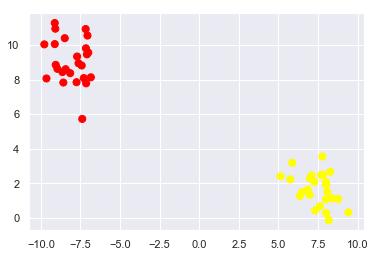

In [2]:
from sklearn.datasets import make_blobs 
# create multiclass datasets by allocating each class one or more normally-distributed clusters of points
#  make_blobs provides greater control regarding the centers and standard deviations of each cluster, and is used to demonstrate clustering.
X, y = make_blobs(n_samples=50, centers=2, cluster_std = 1)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')

In [3]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10) # hard margin (no error) svm
#C is a Regularization parameter. The strength of the regularization is inversely proportional to C.  The penalty is a squared l2 penalty.

model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [4]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """ Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

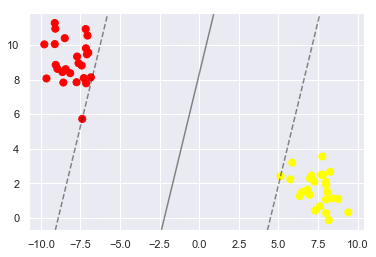

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [6]:
model.support_vectors_

array([[-7.38593101,  5.7217094 ],
       [ 5.13341052,  2.41027417]])

### Kernel SVM

A data like this
requires a Wavy discriminant function,
and a **traditional** maximum margin solution works poor!

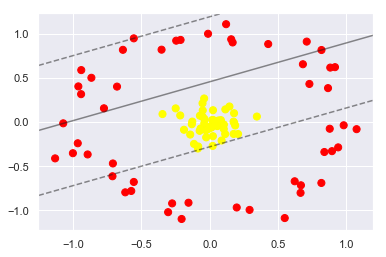

In [7]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y) #linear kernel not a good choice!

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

RBF kernel expands the input space to infinite feature space so that any classifier can be drawn!

In [8]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

C:\Users\drlim\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

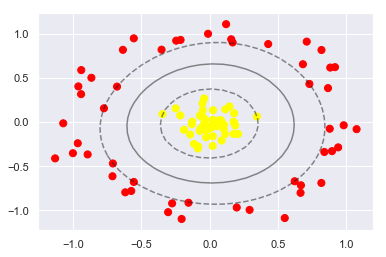

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

### (HW1) Multiclass SVM: iris dataset

https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/ 

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [11]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [12]:
iris = datasets.load_iris()
X = iris.data[:,:2]
# All rows, but only first 2 columns! (2 dimensional!)

y= iris.target
print(X)
print(y)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

In [13]:
C = 1.0 #set as default anyway
svc_lin = svm.SVC(kernel= 'linear',C=1).fit(X,y)

In [14]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

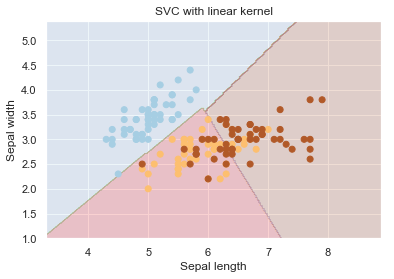

In [15]:

plt.subplot(1, 1, 1)
Z = svc_lin.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

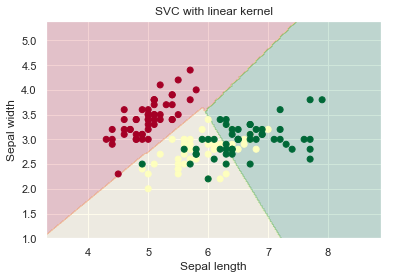

In [16]:

plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

#linear kernel (first section!, no basis expansion)

Vary parameters in polynomial kernels!

1) Degree
2) Gamma

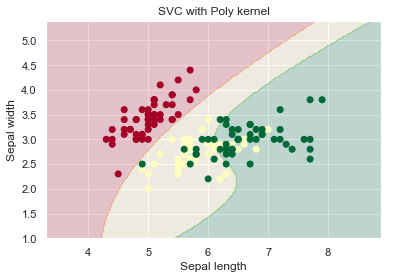

In [29]:
# poly kernel
svc_poly = svm.SVC(kernel='poly', C=1,degree=4,gamma=1).fit(X, y)
Z = svc_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Poly kernel')
plt.show()

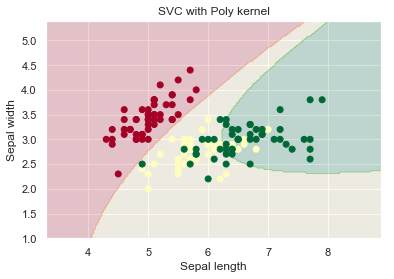

In [18]:
# poly kernel
svc_poly = svm.SVC(kernel='poly', C=1,degree=3,gamma=1).fit(X, y)
Z = svc_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Poly kernel')
plt.show()

Vary Gamma!

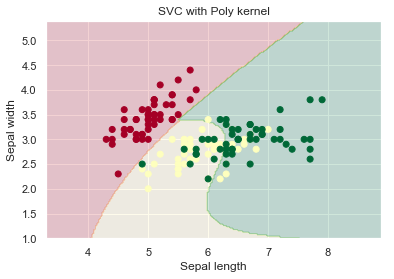

In [19]:
# poly kernel
svc_poly = svm.SVC(kernel='poly', C=1,degree=3,gamma=10).fit(X, y)
Z = svc_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Poly kernel')
plt.show()

## RBF Kernel

Two arguments to vary over time 
1) C : C big -> soft margin, C small : like hard margin
2) Gamma : Gamma가 크면 더욱 오밀조밀한 boundary

Vary gamma! (C는 계속 의미를 알아왔다)

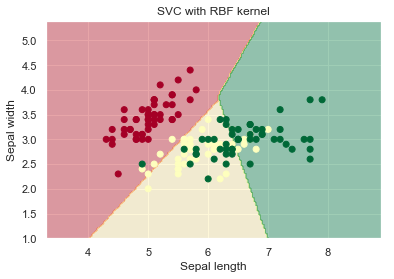

In [20]:
# rbf kernel
svc_rbf = svm.SVC(kernel='rbf', C=1,gamma=0.01).fit(X, y)
Z = svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel')
plt.show()

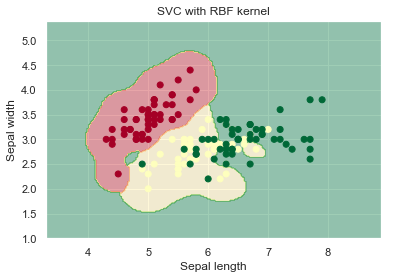

In [21]:
# rbf kernel
svc_rbf = svm.SVC(kernel='rbf', C=1,gamma=11).fit(X, y)
Z = svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel')
plt.show()

Overfitting model generated!

### Group all plots!

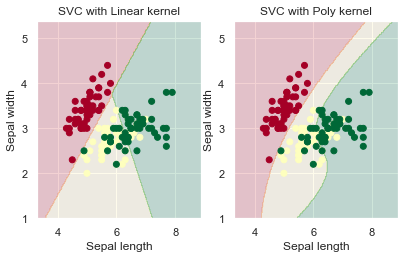

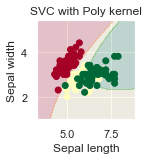

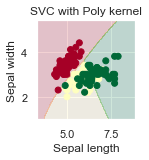

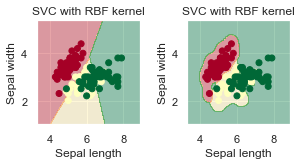

In [35]:
plt.figure(figsize=(10,8))

plt.subplot(231)
svc_linear = svm.SVC(kernel='linear', C=100).fit(X,y) #C가 바뀌더라도 이 데이터에서는 큰 차이가 없다
Z = svc_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Linear kernel')

plt.subplot(232)
# poly kernel
svc_poly = svm.SVC(kernel='poly', C=1,degree=4,gamma=1).fit(X, y)
Z = svc_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Poly kernel')
plt.show()

plt.subplot(233)
# poly kernel
svc_poly = svm.SVC(kernel='poly', C=1,degree=3,gamma=1).fit(X, y)
Z = svc_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Poly kernel')
plt.show()


plt.subplot(234)
# poly kernel
svc_poly = svm.SVC(kernel='poly', C=1,degree=3,gamma=0.1).fit(X, y)
Z = svc_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Poly kernel')
plt.show()











plt.subplot(235)
svc_rbf = svm.SVC(kernel='rbf', C=1,gamma=0.01).fit(X, y)
Z = svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel')


plt.subplot(236)
svc_rbf = svm.SVC(kernel='rbf', C=1,gamma=11).fit(X, y)
Z = svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel')




plt.tight_layout()
plt.show()
# Linear가 가장 좋은 듯

### (HW2) Weighted SVM: toy dataset

https://machinelearningmastery.com/cost-sensitive-svm-for-imbalanced-classification/

### 1) Imbalanced Classification Dataset

한쪽 클래스에만 표본수가 많은 경우다!

표본수가 많은 클래스에는 error의 가중치를 줄이고 표본수가 적은 클래스에서 오분류가 나왔을 때 error의 가중치를 늘리는 것.

In [43]:
# 1) Imbalanced Classification Dataset

from sklearn.datasets import make_classification
from collections import Counter
from numpy import where
import matplotlib.pyplot as plt

In [41]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


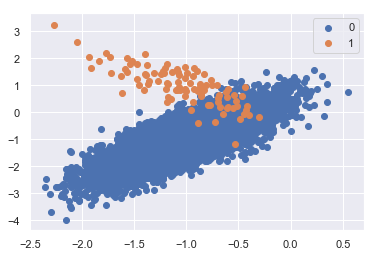

In [48]:
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

#압도적으로 많은 0, 적은 1

#오버래핑이 있다. -> 오분류 불가피


### 2) Standard SVM : poorly functioning


In [51]:

from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC

model = SVC(gamma='scale') #gamma scale : default!

# 10 Fold CV 3번 반복
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) #stratify : y비율 조정
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

# ROC area under the curve 



Mean ROC AUC: 0.804


### ROC curve란

- 분류문제에서 error는 오분류를 말한다

- 오직 binary response에서만 Receiving Operating Characteristic curve가 가능

행렬

                f
         accept    reject

    accept TP        FP
fhat 
    reject FN        TN
    
    
이 행렬에서 TP , TN 은 True Classification이다.

Sen 냐샤퍄쇼:  TP / TP + FN (TP를 얼마나 잘 잡아내는가)

Spe챠랴챠쇼 : TN / TN + FP (TN을 얼마나 잘 찾아내는가)


ROC curve :  S두냐샤퍄쇼(yaxis) , 1- Specificity(x axis)



### 3) Weighted SVM

원래는 각 클래스의 오분류의 데미지는 같았다. 

클래스 0 이 훨씬 많으므로 (100배의 표본수) : 클래스 0쪽에서 오분류를 없애려고 할 것이다 (클래스 0에 치우친 :in favor of 결정경계가 나온다)

--> 클래스 0 : 적은 weight를 주고
--> 클래스 1 : 큰 weight를 주게 되는 

**weighted SVM**

In [52]:
# define model
weights = {0:1.0, 1:100.0}
model = SVC(gamma='scale', class_weight=weights)

# define model
weights = {0:0.01, 1:1.0}
model = SVC(gamma='scale', class_weight=weights)


# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

# define model
model = SVC(gamma='scale', class_weight='balanced')

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))


# Way 

Mean ROC AUC: 0.964


Weighted SVM 은 단지 Heu ristic(어림짐작의 방법)

100 : 1 (클래스 1과 클래스 0의 weight)은 단지 하나의 방법일 뿐이라는 것이다

We will try the following weightings for class 0 and 1:
- Class 0: 100, Class 1: 1
- Class 0: 10, Class 1: 1
- Class 0: 1, Class 1: 1
- Class 0: 1, Class 1: 10
- Class 0: 1, Class 1: 100

이렇게 다양한 가중치 조합을 생성해 낸 다음 최고의 ROC area under curve를 찾는다!

In [53]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC

# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

# define model
model = SVC(gamma='scale')

# define grid
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
param_grid = dict(class_weight=balance)

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

# execute the grid search
grid_result = grid.fit(X, y)

# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.966189 using {'class_weight': {0: 1, 1: 100}}
0.745249 (0.129002) with: {'class_weight': {0: 100, 1: 1}}
0.748407 (0.128049) with: {'class_weight': {0: 10, 1: 1}}
0.803727 (0.103536) with: {'class_weight': {0: 1, 1: 1}}
0.932620 (0.059869) with: {'class_weight': {0: 1, 1: 10}}
0.966189 (0.036310) with: {'class_weight': {0: 1, 1: 100}}
